Income Qualification

DESCRIPTION

Identify the level of income qualification needed for the families in Latin America.

Problem Statement Scenario:

Many social programs have a hard time ensuring that the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of the population can’t provide the necessary income and expense records to prove that they qualify.
In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling, or the assets found in their homes to
classify them and predict their level of need.

While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.
The Inter-American Development Bank (IDB)believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

Following actions should be performed:

•	Identify the output variable.

•	Understand the type of data.

•	Check if there are any biases in your dataset.

•	Check whether all members of the house have the same poverty level.

•	Check if there is a house without a family head.

•	Set poverty level of the members and the head of the house within a family.

•	Count how many null values are existing in columns.

•	Remove null value rows of the target variable.

•	Predict the accuracy using random forest classifier.

•	Check the accuracy using random forest with cross validation.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings('ignore')


Identify the output variable:

In [3]:
# Load the dataset

household_test = pd.read_csv('test.csv')
household_train = pd.read_csv('train.csv')

In [4]:
for i in household_train.columns:
    if i not in household_test.columns:
        print("Our Output variable is {}".format(i))

Our Output variable is Target


In [5]:
Output = household_train.Target.value_counts().to_frame().reset_index().rename(columns={'index':'Label', 'Target':'Count'})
Output

,Label,Count
0,4,5996
1,2,1597
2,3,1209
3,1,755


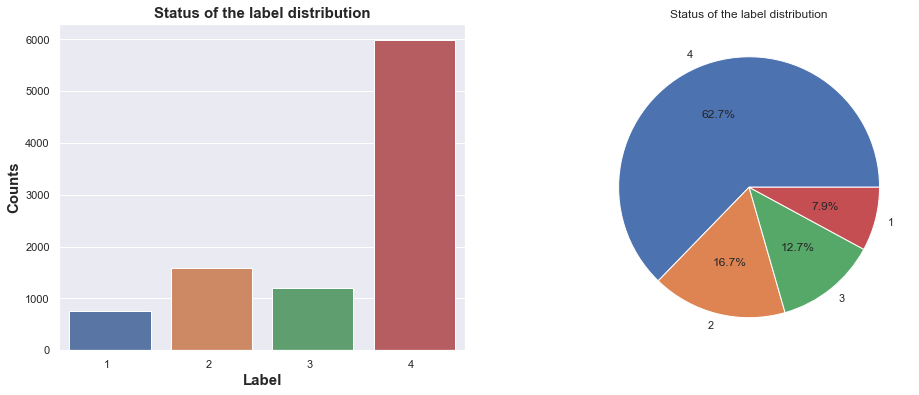

In [6]:
fig, ax = plt.subplots(1,2, figsize=(16,6))

bar = sns.barplot(x=Output.Label, y=Output.Count, ax=ax[0])
bar.set_xticklabels(bar.get_xticklabels(), rotation=0, ha="right")
bar.set_xlabel('Label', weight='bold', size=15)
bar.set_ylabel('Counts', weight='bold', size=15)
bar.set_title('Status of the label distribution', weight='bold', size=15)

ax[1].pie(Output.Count, labels = Output.Label, autopct='%1.1f%%')
ax[1].set_title('Status of the label distribution')

plt.show()

Explore Test dataset

In [7]:
household_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


Test dataset:

Rows: 23856 entries, 0 to 23855

Columns: 142 entries, Id to agesq

dtypes: float64(8), int64(129), object(5)

We don’t have ‘Target’ feature in Test Dataset. 

The following are the important features of the data set :

5 object type, 

130(Train set)/ 

129 (test set) 

129 integer type and 

8 float type 


Features in the Test dataset are :

In [8]:
#List the columns for different datatypes:
print('Integer Type: ')
print( household_train.select_dtypes(np.int64).columns)
print('\n')
print('Float Type: ')
print(household_train.select_dtypes(np.float64).columns)
print('\n')
print('Object Type: ')
print(household_train.select_dtypes(np.object).columns)

Integer Type: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type: 
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


Object Type: 
Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')


In [8]:
# Print the shape of the dataset
print(household_test.shape)
print(household_train.shape)


(23856, 142)
(9557, 143)


In [9]:
# Print the column names
print(household_test.columns)
print(household_train.columns)


Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=142)
Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)


In [9]:
# Analyze the content of the dataset
print(household_test.head())
print(household_train.head())


             Id      v2a1  hacdor  rooms  hacapo  v14a  refrig  v18q  v18q1  \
0  ID_2f6873615       NaN       0      5       0     1       1     0    NaN   
1  ID_1c78846d2       NaN       0      5       0     1       1     0    NaN   
2  ID_e5442cf6a       NaN       0      5       0     1       1     0    NaN   
3  ID_a8db26a79       NaN       0     14       0     1       1     1    1.0   
4  ID_a62966799  175000.0       0      4       0     1       1     1    1.0   

   r4h1  ...  age  SQBescolari  SQBage  SQBhogar_total  SQBedjefe  \
0     1  ...    4            0      16               9          0   
1     1  ...   41          256    1681               9          0   
2     1  ...   41          289    1681               9          0   
3     0  ...   59          256    3481               1        256   
4     0  ...   18          121     324               1          0   

   SQBhogar_nin  SQBovercrowding  SQBdependency  SQBmeaned  agesq  
0             1             2.25          

Lets fix the column with mixed values.


Core Data fields

1. Id - a unique identifier for each row.

2. Target - the target is an ordinal variable indicating groups of income levels.

   1 = extreme poverty 

   2 = moderate poverty 

   3 = vulnerable households 
   
   4 = non vulnerable households

3. idhogar - this is a unique identifier for each household. This can be used to create household-wide features, etc. All rows in a given household will have a matching value for this identifier.

4. parentesco1 - indicates if this person is the head of the household.

As per the documentation for these segments:

reliance: Reliance rate, determined = (number of individuals from the family more youthful than 19 or more established than 64)/(number of individual from family somewhere in the range of 19 and 64)

edjefe: long stretches of schooling of male head of family, in view of the connection of escolari (long stretches of training), head of family and orientation, yes=1 and no=0

edjefa: long periods of training of female head of family, in view of the association of escolari (long stretches of schooling), head of family and orientation, yes=1 and no=0

For these three factors, it appears "yes" = 1 and "no" = 0. We can address the factors utilizing a planning and convert to floats.

Understand the type of data.


In [11]:
household_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


There are:

No of features that have data type 'float64' = 8

No of features that have data type 'int64' = 130

No of features that have data type 'object64' = 6

Thus we need to convert these object data type to numerical to insert in model calculation.


In [12]:
for i in household_train.columns:
    data_type = household_train[i].dtype
    if data_type == 'object':
        print(i)

Id
idhogar
dependency
edjefe
edjefa


In [13]:
for i in household_train.columns:
    data_type = household_train[i].dtype
    if data_type == 'float':
        print(i)


v2a1
v18q1
rez_esc
meaneduc
overcrowding
SQBovercrowding
SQBdependency
SQBmeaned


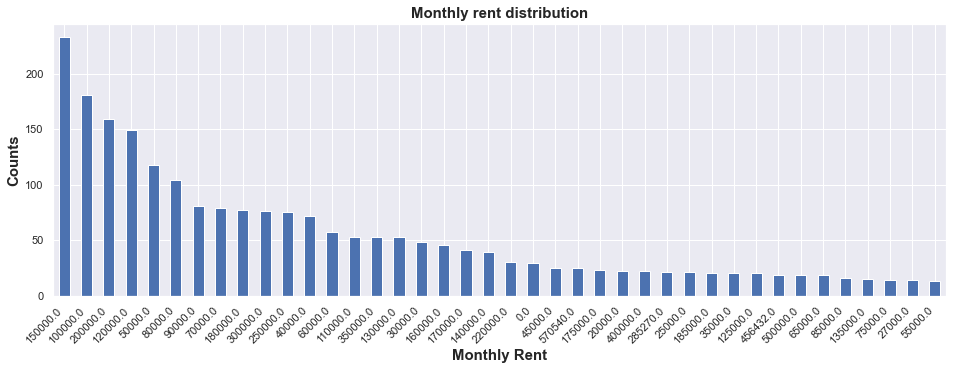

In [15]:
plt.figure(figsize=(16,5))
rent = household_train.v2a1.value_counts().head(40).plot(kind='bar')
rent.set_xticklabels(rent.get_xticklabels(), rotation=45, ha="right")
rent.set_xlabel('Monthly Rent', weight='bold', size=15)
rent.set_ylabel('Counts', weight='bold', size=15)
rent.set_title('Monthly rent distribution', weight='bold', size=15)
plt.show()

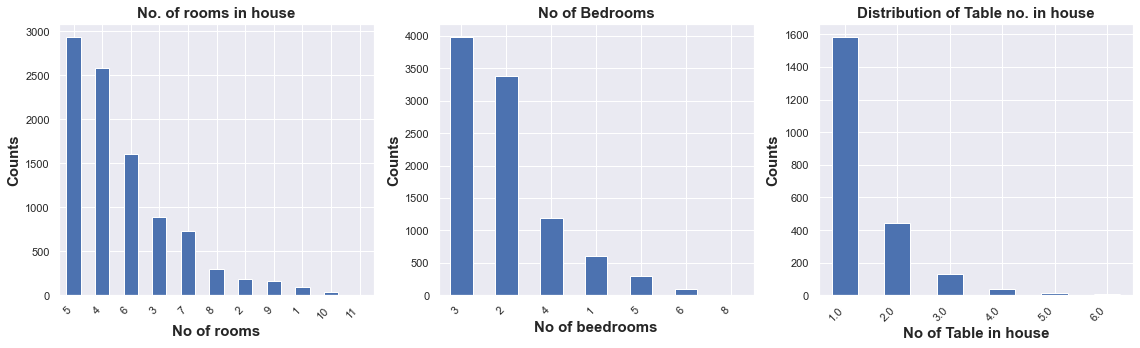

In [16]:
fig, ax = plt.subplots(1,3, figsize=(16,5))

room = household_train.rooms.value_counts().plot(kind='bar',ax=ax[0])
room.set_xticklabels(room.get_xticklabels(), rotation=45, ha="right")
room.set_xlabel('No of rooms', weight='bold', size=15)
room.set_ylabel('Counts', weight='bold', size=15)
room.set_title('No. of rooms in house', weight='bold', size=15)

bedroom = household_train.bedrooms.value_counts().plot(kind='bar',ax=ax[1])
bedroom.set_xticklabels(bedroom.get_xticklabels(), rotation=45, ha="right")
bedroom.set_xlabel('No of beedrooms', weight='bold', size=15)
bedroom.set_ylabel('Counts', weight='bold', size=15)
bedroom.set_title('No of Bedrooms', weight='bold', size=15)

table = household_train.v18q1.value_counts().plot(kind='bar',ax=ax[2])
table.set_xticklabels(table.get_xticklabels(), rotation=45, ha="right")
table.set_xlabel('No of Table in house', weight='bold', size=15)
table.set_ylabel('Counts', weight='bold', size=15)
table.set_title('Distribution of Table no. in house', weight='bold', size=15)

plt.tight_layout()

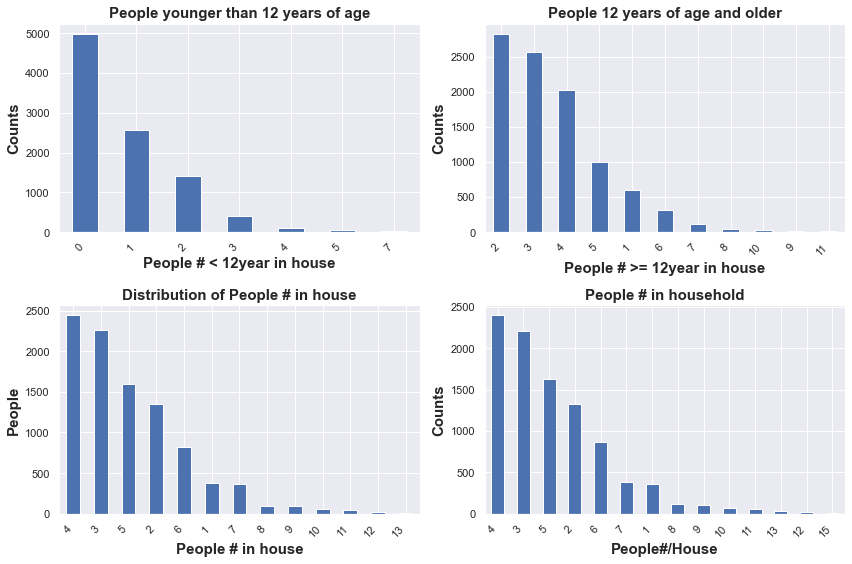

In [21]:
fig, ax = plt.subplots(2,2, figsize=(12,8))

persony = household_train.r4t1.value_counts().plot(kind='bar',ax=ax[0,0])
persony.set_xticklabels(persony.get_xticklabels(), rotation=45, ha="right")
persony.set_xlabel('People # < 12year in house', weight='bold', size=15)
persony.set_ylabel('Counts', weight='bold', size=15)
persony.set_title('People younger than 12 years of age', weight='bold', size=15)

persono = household_train.r4t2.value_counts().plot(kind='bar',ax=ax[0,1])
persono.set_xticklabels(persono.get_xticklabels(), rotation=45, ha="right")
persono.set_xlabel('People # >= 12year in house', weight='bold', size=15)
persono.set_ylabel('Counts', weight='bold', size=15)
persono.set_title('People 12 years of age and older', weight='bold', size=15)

female = household_train.r4t3.value_counts().plot(kind='bar',ax=ax[1,0])
female.set_xticklabels(female.get_xticklabels(), rotation=45, ha="right")
female.set_xlabel('People # in house', weight='bold', size=15)
female.set_ylabel('People', weight='bold', size=15)
female.set_title('Distribution of People # in house', weight='bold', size=15)

pliveh = household_train.tamviv.value_counts().plot(kind='bar',ax=ax[1,1])
pliveh.set_xticklabels(pliveh.get_xticklabels(), rotation=45, ha="right")
pliveh.set_xlabel('People#/House', weight='bold', size=15)
pliveh.set_ylabel('Counts', weight='bold', size=15)
pliveh.set_title('People # in household', weight='bold', size=15)

plt.tight_layout()

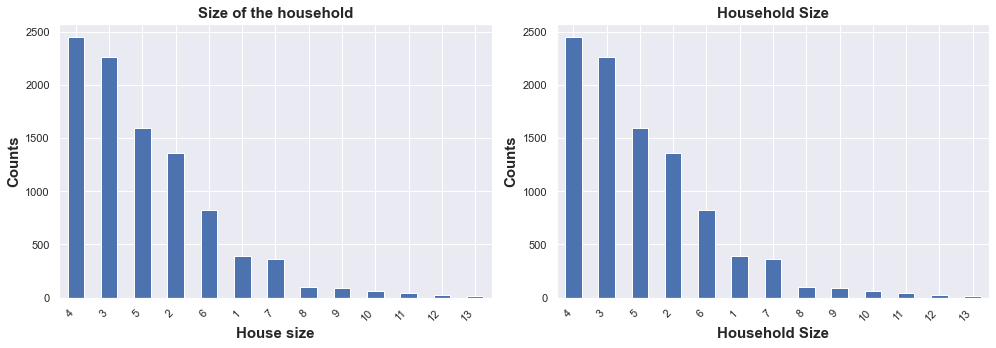

In [29]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

size = household_train.tamhog.value_counts().plot(kind='bar',ax=ax[0])
size.set_xticklabels(size.get_xticklabels(), rotation=45, ha="right")
size.set_xlabel('House size', weight='bold', size=15)
size.set_ylabel('Counts', weight='bold', size=15)
size.set_title('Size of the household', weight='bold', size=15)

hhsize = household_train.hhsize.value_counts().plot(kind='bar',ax=ax[1])
hhsize.set_xticklabels(hhsize.get_xticklabels(), rotation=45, ha="right")
hhsize.set_xlabel('Household Size', weight='bold', size=15)
hhsize.set_ylabel('Counts', weight='bold', size=15)
hhsize.set_title('Household Size', weight='bold', size=15)

plt.tight_layout()

This comparison shows, two variables ('tamhog', 'hhsize') are identical. Let's see numerically.

In [33]:
null = 0
for diff in range (household_train.shape[0]):
    Difference = 0
    Difference = (household_train.loc[diff,'tamhog'] - household_train.loc[diff,'hhsize'])
    if (Difference==0):
        null = null+1
print('Total 0 value = {} among {} value'.format(null,household_train.shape[0]))

Total 0 value = 9557 among 9557 value


Thus the columns contains identical values and so we can drop any one of them.



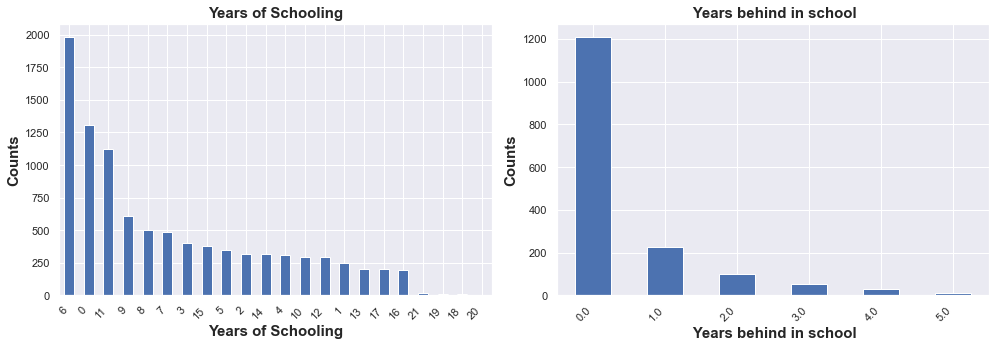

In [34]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

yearsch = household_train.escolari.value_counts().plot(kind='bar',ax=ax[0])
yearsch.set_xticklabels(yearsch.get_xticklabels(), rotation=45, ha="right")
yearsch.set_xlabel('Years of Schooling', weight='bold', size=15)
yearsch.set_ylabel('Counts', weight='bold', size=15)
yearsch.set_title('Years of Schooling', weight='bold', size=15)

yearschl = household_train.rez_esc.value_counts().plot(kind='bar',ax=ax[1])
yearschl.set_xticklabels(yearschl.get_xticklabels(), rotation=45, ha="right")
yearschl.set_xlabel(' Years behind in school', weight='bold', size=15)
yearschl.set_ylabel('Counts', weight='bold', size=15)
yearschl.set_title(' Years behind in school', weight='bold', size=15)

plt.tight_layout()

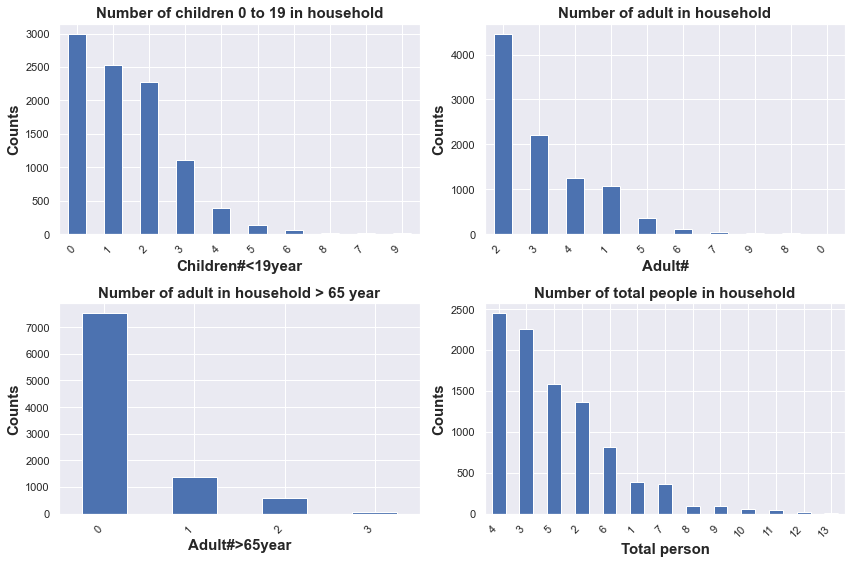

In [36]:
fig, ax = plt.subplots(2,2, figsize=(12,8))

child19 = household_train.hogar_nin.value_counts().plot(kind='bar',ax=ax[0,0])
child19.set_xticklabels(child19.get_xticklabels(), rotation=45, ha="right")
child19.set_xlabel('Children#<19year', weight='bold', size=15)
child19.set_ylabel('Counts', weight='bold', size=15)
child19.set_title('Number of children 0 to 19 in household', weight='bold', size=15)

adult = household_train.hogar_adul.value_counts().plot(kind='bar',ax=ax[0,1])
adult.set_xticklabels(adult.get_xticklabels(), rotation=45, ha="right")
adult.set_xlabel('Adult#', weight='bold', size=15)
adult.set_ylabel('Counts', weight='bold', size=15)
adult.set_title('Number of adult in household', weight='bold', size=15)

ageg65 = household_train.hogar_mayor.value_counts().plot(kind='bar',ax=ax[1,0])
ageg65.set_xticklabels(ageg65.get_xticklabels(), rotation=45, ha="right")
ageg65.set_xlabel('Adult#>65year', weight='bold', size=15)
ageg65.set_ylabel('Counts', weight='bold', size=15)
ageg65.set_title('Number of adult in household > 65 year', weight='bold', size=15)

totalno = household_train.hogar_total.value_counts().plot(kind='bar',ax=ax[1,1])
totalno.set_xticklabels(totalno.get_xticklabels(), rotation=45, ha="right")
totalno.set_xlabel('Total person', weight='bold', size=15)
totalno.set_ylabel('Counts', weight='bold', size=15)
totalno.set_title('Number of total people in household', weight='bold', size=15)

plt.tight_layout()

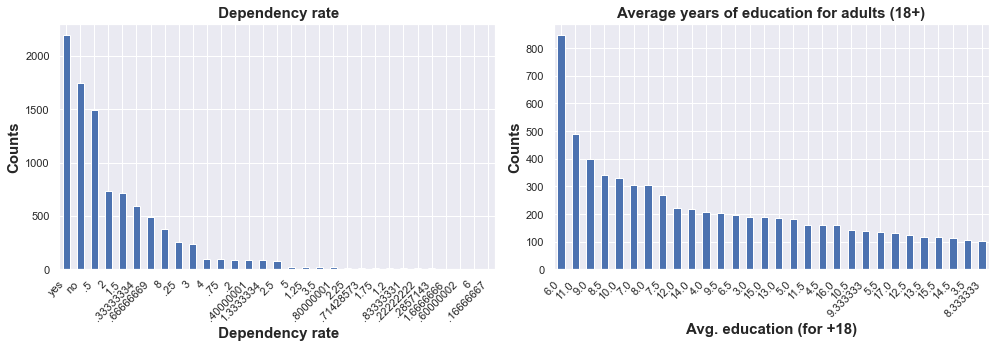

In [37]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

dependency = household_train.dependency.value_counts().plot(kind='bar',ax=ax[0])
dependency.set_xticklabels(dependency.get_xticklabels(), rotation=45, ha="right")
dependency.set_xlabel(' Dependency rate', weight='bold', size=15)
dependency.set_ylabel('Counts', weight='bold', size=15)
dependency.set_title(' Dependency rate', weight='bold', size=15)

meanedu = household_train.meaneduc.value_counts().head(30).plot(kind='bar',ax=ax[1])
meanedu.set_xticklabels(meanedu.get_xticklabels(), rotation=45, ha="right")
meanedu.set_xlabel('Avg. education (for +18)', weight='bold', size=15)
meanedu.set_ylabel('Counts', weight='bold', size=15)
meanedu.set_title('Average years of education for adults (18+)', weight='bold', size=15)

plt.tight_layout()

In [38]:
household_train.dependency.value_counts().head()


yes    2192
no     1747
.5     1497
2       730
1.5     713
Name: dependency, dtype: int64

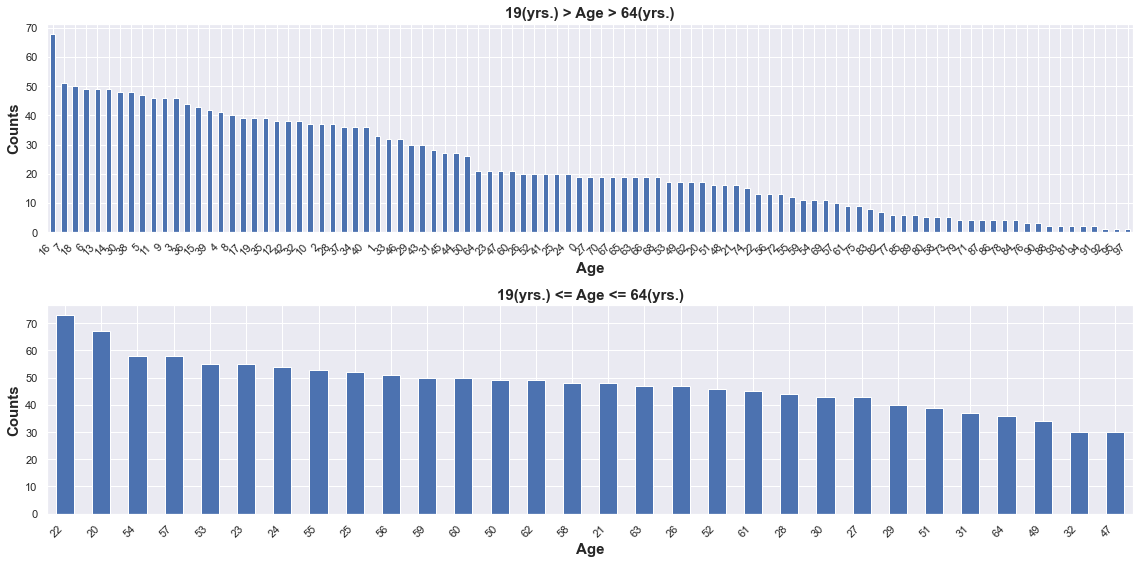

In [42]:
fig, ax = plt.subplots(2,1, figsize=(16,8))

depyes = household_train.loc[(household_train.dependency=='yes'),'age'].value_counts().plot(kind='bar',ax=ax[0])
depyes.set_xticklabels(depyes.get_xticklabels(), rotation=45, ha="right")
depyes.set_xlabel('Age', weight='bold', size=15)
depyes.set_ylabel('Counts', weight='bold', size=15)
depyes.set_title('19(yrs.) > Age > 64(yrs.)', weight='bold', size=15)

depno = household_train.loc[(household_train.dependency=='no'),'age'].value_counts().head(30).plot(kind='bar',ax=ax[1])
depno.set_xticklabels(depno.get_xticklabels(), rotation=45, ha="right")
depno.set_xlabel('Age', weight='bold', size=15)
depno.set_ylabel('Counts', weight='bold', size=15)
depno.set_title('19(yrs.) <= Age <= 64(yrs.)', weight='bold', size=15)
plt.tight_layout()

- If we look carefully,it is clear that 'no' category contains age values from 19 to 64 yrs. which is expected.

- Similarly, 'yes' category should contain an age value of less than 19 and greater than 64. However, there is some observation where this does not holds.
 
- So we can replace yes by 1 and no by 0.

In [45]:
household_train['dep_corected'] = household_train.dependency.replace({'yes':float(1),'no':float(0)})
household_train.loc[((household_train.dependency=='yes')|(household_train.dependency=='no')),['dep_corected','dependency']].sample(6)

,dep_corected,dependency
4691,0.0,no
8285,0.0,no
5475,0.0,no
720,1.0,yes
1031,0.0,no
2608,0.0,no


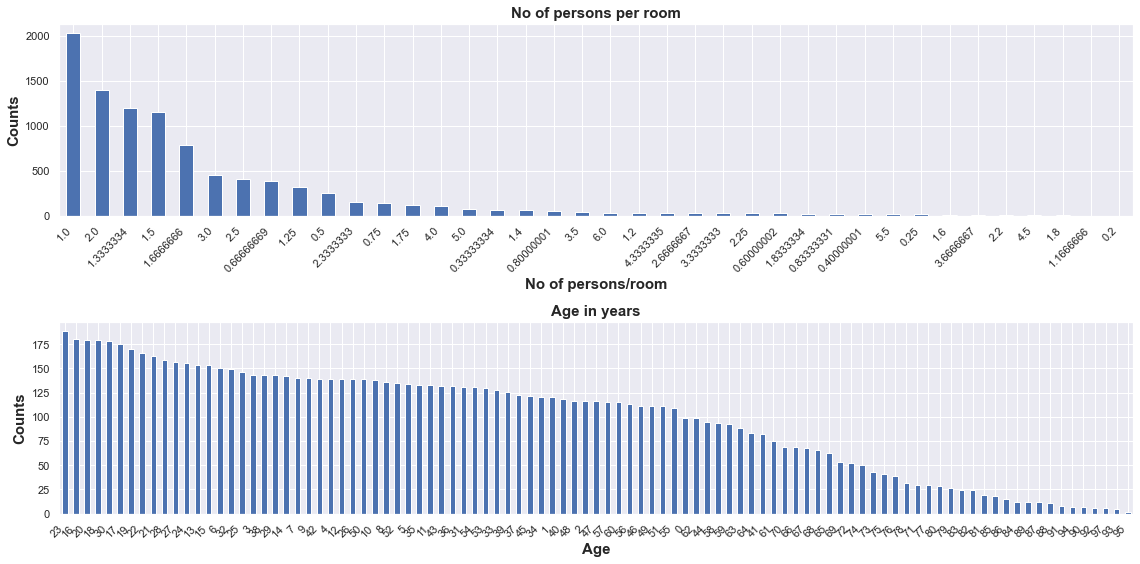

In [43]:
fig, ax = plt.subplots(2,1, figsize=(16,8))

overcrd = household_train.overcrowding.value_counts().plot(kind='bar',ax=ax[0])
overcrd.set_xticklabels(overcrd.get_xticklabels(), rotation=45, ha="right")
overcrd.set_xlabel('No of persons/room', weight='bold', size=15)
overcrd.set_ylabel('Counts', weight='bold', size=15)
overcrd.set_title('No of persons per room', weight='bold', size=15)

agey = household_train.age.value_counts().plot(kind='bar',ax=ax[1])
agey.set_xticklabels(agey.get_xticklabels(), rotation=45, ha="right")
agey.set_xlabel('Age', weight='bold', size=15)
agey.set_ylabel('Counts', weight='bold', size=15)
agey.set_title('Age in years', weight='bold', size=15)

plt.tight_layout()

In [46]:
household_train.describe(include='object')


,Id,idhogar,dependency,edjefe,edjefa,dep_corected
count,9557,9557,9557,9557,9557,9557.0
unique,9557,2988,31,22,22,31.0
top,ID_279628684,fd8a6d014,yes,no,no,1.0
freq,1,13,2192,3762,6230,2192.0


So there is no categorical variable that has a single unique value.

We need to convert these 'edjefe' and 'edjefa' columns (features) from object to numeric type.

In [47]:
household_train['edjefe1'] = household_train.edjefe.replace({'yes':float(1),'no':float(0)})
household_train['edjefa1'] = household_train.edjefa.replace({'yes':float(1),'no':float(0)})
household_train.loc[((household_train.edjefe=='yes')|(household_train.edjefe=='no')|(household_train.edjefa=='yes')|(household_train.edjefa=='no')),
               ['edjefe','edjefe1','edjefa','edjefa1']].sample(6)

,edjefe,edjefe1,edjefa,edjefa1
2082,no,0.0,17,17
5046,no,0.0,3,3
5486,6,6,no,0.0
8810,9,9,no,0.0
2339,no,0.0,9,9
2932,no,0.0,11,11


Let's find if there any continuous variables which have 0 variances.

In [49]:
variance = pow(household_train.drop(columns={'Id','Target','dependency'}).std(),2).to_dict()

null_cnt = 0
for key, value in variance.items():
    if(value==0):
        print('Name = ',key)
        null_cnt = null_cnt+1
print('No of columns which has zero variance = ',null_cnt)

Name =  elimbasu5
No of columns which has zero variance =  1


We need to drop this variable as well. since it has 0 variance which basically indicates a single entry and does not influence the outcome.

Now dropping the unnecessary variables, let's clean the data for subsequent processing.

In [50]:
train = household_train.drop(columns={'Id','idhogar','tamhog','dependency','elimbasu5','edjefe','edjefa'})
train.shape
(9557, 139)

(9557, 139)

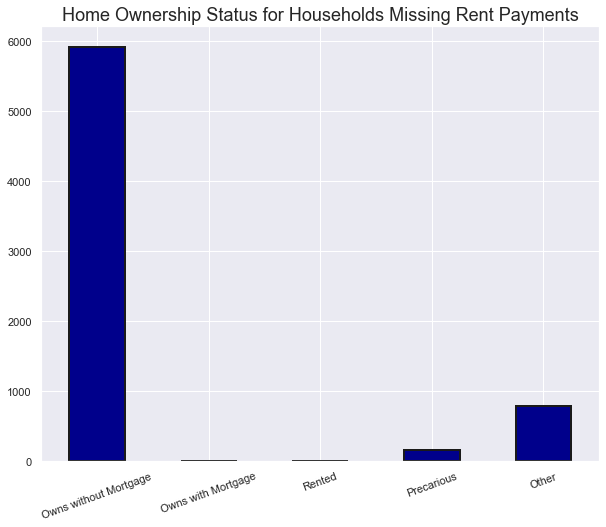

In [26]:
# Variables indicating home ownership
own_variables = [x for x in household_train if x.startswith('tipo')]

# Plot of the home ownership variables for home missing rent payments
household_train.loc[household_train['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
                                                                        color = 'darkblue',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns without Mortgage', 'Owns with Mortgage', 'Rented', 'Precarious', 'Other'],
          rotation = 20)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

Looking at the above data it makes sense that when the house is fully paid, there will be no monthly rent payment.


In [14]:
#Lets add 0 for all the null values.
for household in [household_train, household_test]:
    household['v2a1'].fillna(value=0, inplace=True)

household_train[['v2a1']].isnull().sum()

v2a1    0
dtype: int64

Check if there are any biases in your dataset.


Biases in data are usually checked by examining the outliers, null values, deviation from expected values of the feature. The same can be performed using statistical methods.



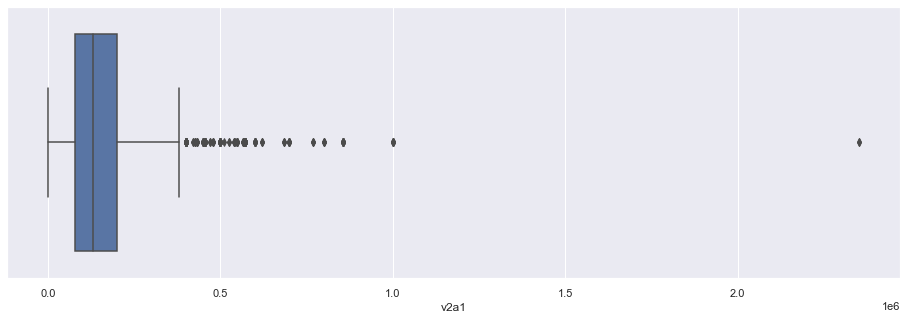

In [51]:
plt.figure(figsize = (16,5))
box = sns.boxplot(x = train.v2a1)
plt.show()

In [52]:
import scipy.stats as stat

In [53]:
result = stat.chi2_contingency(pd.crosstab(train.v18q1, train.v18q))

if (result[1]<.05):
    print('Feature v18q and v18q1 has some relation')
else:
    print('Feature v18q and v18q1 has no relation since p-value =',result[1])

Feature v18q and v18q1 has no relation since p-value = 1.0


Check whether all members of the house have the same poverty level


In [54]:
poverty_level = household_train.groupby(['idhogar','Target'])['idhogar'].count().to_frame().rename(
    columns={'idhogar':'Count'}).reset_index().sort_values(['Count'],ascending=False)
poverty_level.head(8)

,idhogar,Target,Count
3032,fd8a6d014,1,13
155,0c7436de6,4,12
2101,ae6cf0558,3,12
841,4476ccd4c,4,11
1320,6b35cdcf0,4,11
2199,b7a0b59d7,2,11
201,0fc6c05f7,4,10
1307,6a96a96c0,4,10


As it is clear from the above data frame that the id's corresponding to the house only has a single Target type with single/multiple house members.



In [55]:
train.parentesco1.value_counts().to_frame().reset_index().rename(columns={'index':'Present/Not','parentesco1':'Counts'})

,Present/Not,Counts
0,0,6584
1,1,2973


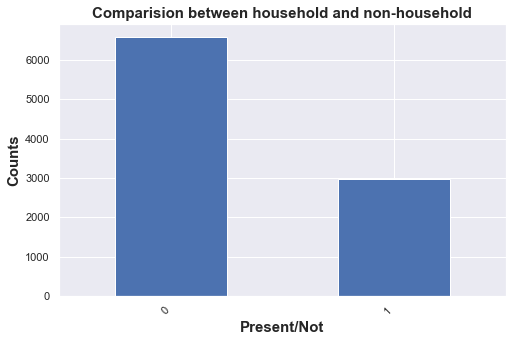

In [58]:
plt.figure(figsize=(8,5))
rent = train.parentesco1.value_counts().plot(kind='bar')
rent.set_xticklabels(rent.get_xticklabels(), rotation=45, ha="right")
rent.set_xlabel('Present/Not', weight='bold', size=15)
rent.set_ylabel('Counts', weight='bold', size=15)
rent.set_title('Comparision between household and non-household', weight='bold', size=15)
plt.show()

1 indicates the proportion of household-based on Id.

However, it does not imply with 0 has no household. It simply based on Id.

To get the number of the house without any house head, we need to calculate the number of houses where no male and/ female house head are present

In [60]:
no_head = len(train[((train.edjefa1==0) & (train.edjefe1==0))].index)
print('No. of house without family head = ',no_head)

No. of house without family head =  435


Set poverty level of the members and the head of the house within a family.

There are different parameters which can be used in a various way to define the poverty level. However, in a simple approach, we introduce a few parameters to define poverty level.

Since depending upon the distribution of the parameters, the index for poverty level needs to be defined. Thus, without going to further in-depth details, we can use mean or median for such analysis.

And the for the missing data treatment -

the nan value in 'v18q1' indicates the person does not have any tables, so replaced by 0.
the nan value in 'v2a1' indicates the person owns the house, so replaced by the mean value.

In [62]:
poverty_lev = household_train[['v2a1','hhsize','rooms','v18q1','refrig']]
poverty_lev = poverty_lev.fillna(value={'v2a1':0, 'v18q1':0})
poverty_lev['Level'] = (poverty_lev.v2a1+poverty_lev.rooms+poverty_lev.v18q1+poverty_lev.hhsize+poverty_lev.refrig)

pov_median_rent = (poverty_lev.v2a1[poverty_lev.v2a1!=0].median()+poverty_lev.rooms.median()+poverty_lev.v18q1.median()+
                    poverty_lev.hhsize.median()+1)
pov_median_own = (poverty_lev.rooms[poverty_lev.v2a1==0].median()+poverty_lev.v18q1.median()+poverty_lev.hhsize.median()+1)

print('Index as per median for rent =', pov_median_rent)
print('Index as per median for ownerhip =', pov_median_own)

for i in range (len(poverty_lev.v2a1)):
    if (((poverty_lev.at[i,'v2a1']==0)&(poverty_lev.at[i,'Level']<pov_median_own))|
        ((poverty_lev.at[i,'v2a1']!=0)&(poverty_lev.at[i,'Level']<pov_median_rent))):
        poverty_lev.at[i,'Status(median)'] = 'Below proverty'
    else:
        poverty_lev.at[i,'Status(median)'] = 'Above proverty'
        
pov_mean_rent = (poverty_lev.v2a1[poverty_lev.v2a1!=0].mean()+poverty_lev.rooms.mean()+poverty_lev.v18q1.mean()+
                  poverty_lev.hhsize.mean()+1)
pov_mean_own = (poverty_lev.rooms[poverty_lev.v2a1==0].mean()+poverty_lev.v18q1.mean()+poverty_lev.hhsize.mean()+1)

print('Index as per mean for rent =', pov_mean_rent)
print('Index as per mean for ownerhip =', pov_mean_own)

for i in range (len(poverty_lev.v2a1)):
    if (((poverty_lev.at[i,'v2a1']==0)&(poverty_lev.at[i,'Level']<pov_mean_own))|
        ((poverty_lev.at[i,'v2a1']!=0)&(poverty_lev.at[i,'Level']<pov_mean_rent))):
        poverty_lev.at[i,'Status(mean)'] = 'Below poverty'
    else:
        poverty_lev.at[i,'Status(mean)'] = 'Above poverty'

poverty_lev.sample(10)

Index as per median for rent = 130010.0
Index as per median for ownerhip = 10.0
Index as per mean for rent = 167037.8827028361
Index as per mean for ownerhip = 10.356989811974278


,v2a1,hhsize,rooms,v18q1,refrig,Level,Status(median),Status(mean)
1587,0.0,8,5,0.0,1,14.0,Above proverty,Above poverty
1303,0.0,4,7,1.0,1,13.0,Above proverty,Above poverty
2314,0.0,4,6,1.0,1,12.0,Above proverty,Above poverty
3373,0.0,2,4,1.0,1,8.0,Below proverty,Below poverty
2065,325000.0,2,5,2.0,1,325010.0,Above proverty,Above poverty
4769,300000.0,6,9,0.0,1,300016.0,Above proverty,Above poverty
7031,55000.0,3,3,0.0,1,55007.0,Below proverty,Below poverty
50,120000.0,4,5,0.0,1,120010.0,Below proverty,Below poverty
928,0.0,2,5,0.0,1,8.0,Below proverty,Below poverty
3192,0.0,4,6,0.0,1,11.0,Above proverty,Above poverty


In [63]:
print('Based on median calculation ---------')
print(poverty_lev['Status(median)'].value_counts())
print('\n\n')
print('Based on mean calculation ---------')
print(poverty_lev['Status(mean)'].value_counts())

Based on median calculation ---------
Above proverty    5305
Below proverty    4252
Name: Status(median), dtype: int64



Based on mean calculation ---------
Below poverty    5761
Above poverty    3796
Name: Status(mean), dtype: int64


It is noteworthy that depending upon the definition of the poverty level the numbers (for below and above) vary.



Count how many null values are existing in columns.


In [65]:
null_data = train.isnull().sum().to_dict()
for key, value in null_data.items():
    if(value!=0):
        print('Name = ',key,'\t Value = ',value,'\t In percent = ',np.around((value*100)/household_train.shape[0],decimals=2),'%')

Name =  v2a1 	 Value =  6860 	 In percent =  71.78 %
Name =  v18q1 	 Value =  7342 	 In percent =  76.82 %
Name =  rez_esc 	 Value =  7928 	 In percent =  82.95 %
Name =  meaneduc 	 Value =  5 	 In percent =  0.05 %
Name =  SQBmeaned 	 Value =  5 	 In percent =  0.05 %


According to the documentation for these columns :

v2a1 (total nulls: 6860) : Monthly rent payment :

v18q1 (total nulls: 7342) : number of tablets household owns

rez_esc (total nulls: 7928) : Years behind in school

meaneduc (total nulls: 5) : average years of education for adults (18+)

SQBmeaned (total nulls: 5) : square of the mean years of education of adults (>=18) in the household 142

Remove null value rows of the target variable.


In [66]:
train1 = train.dropna()
train1.isnull().sum().any()

False

In [67]:
train1.shape


(156, 139)

As, it is clear from the prescribed analysis dropping rows with null values yields a very small part of data, based on which we can not predict any model.

So, to build a proper model we need to replace the null values as mentioned earlier.

In [68]:
train.shape


(9557, 139)

Replacing the missing values with appropriate values


Since we modified these two columns, hence we can drop the columns ('tipovivi3' and 'v18q') which represents weather entry has ye/no.

Also, the columns 'rez_esc' contain missing value more than 70% and do not has any impact on Target variables. So we drop it as well.

In [72]:
train = train.fillna(value={'v2a1':0, 'v18q1':0})
train = train.drop(columns={'tipovivi3','v18q','rez_esc'})
train.shape

(9557, 136)

To replace the missing value in 'meaneduc' and 'SQBmeaned', we need to check which statistical parameters is valid and then replace these by the corresponding values.

In [73]:
print('Mean Values ----')
print(train[['meaneduc','SQBmeaned']].mean())
print('\n')
print('Mode values ----')
print(train[['meaneduc','SQBmeaned']].mode())
print('\n')
print('Median values ----')
print(train[['meaneduc','SQBmeaned']].median())
print('\n')
print('Standard Deviation ----')
(train[['meaneduc','SQBmeaned']].std())

Mean Values ----
meaneduc       9.231523
SQBmeaned    102.588867
dtype: float64


Mode values ----
   meaneduc  SQBmeaned
0       6.0       36.0


Median values ----
meaneduc      9.0
SQBmeaned    81.0
dtype: float64


Standard Deviation ----


meaneduc      4.167694
SQBmeaned    93.516890
dtype: float64

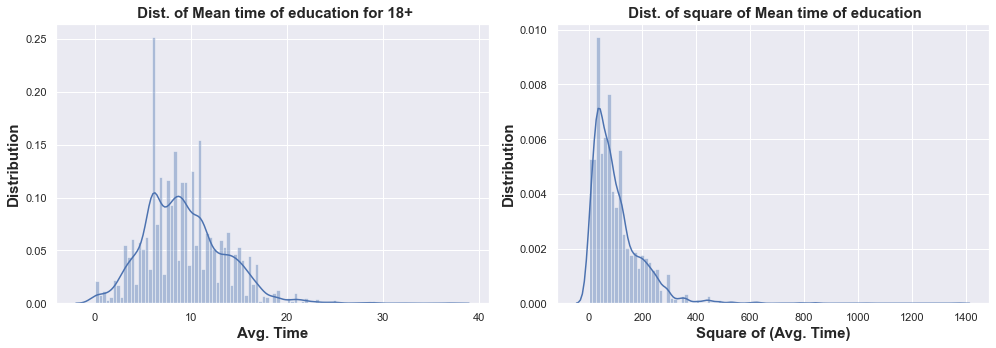

In [74]:
fig, ax = plt.subplots(1,2, figsize=(14,5))

avg_time_ab18 = sns.distplot(train.meaneduc, bins=100, kde=True, ax=ax[0])
avg_time_ab18.set_xlabel('Avg. Time', weight='bold', size=15)
avg_time_ab18.set_ylabel('Distribution', weight='bold', size=15)
avg_time_ab18.set_title(' Dist. of Mean time of education for 18+', weight='bold', size=15)

avg_time_sqrt = sns.distplot(train.SQBmeaned, bins=100, kde=True, ax=ax[1])
avg_time_sqrt.set_xlabel('Square of (Avg. Time)', weight='bold', size=15)
avg_time_sqrt.set_ylabel('Distribution', weight='bold', size=15)
avg_time_sqrt.set_title(' Dist. of square of Mean time of education', weight='bold', size=15)

plt.tight_layout()

From the distribution as well as from the statistic, mentioned above, it is clear that,

for average time of education for 18+ ('meaneduc'), the mean and median almost same so we can replace by any one of them.

however, for square of average time of education ('SQBmeaned'), the mean and median are quite different. 

In this scenario, it is more preferable to replace the missing values by mean.

In [75]:
train = train.fillna(value={'meaneduc': train.meaneduc.mean(), 'SQBmeaned': train.SQBmeaned.mean()})
train.isnull().sum().any()

False

Predict the accuracy using random forest classifier.

Applying Standard Scaling to dataset


In [76]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

In [77]:
feature = train.drop(columns='Target')
target = train.Target
print(feature.shape)
print(target.shape)

(9557, 135)
(9557,)


In [78]:
standard.fit(feature)
feature_standard = standard.fit_transform(feature)

In [79]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=45)
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [80]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(feature_standard,target,test_size=.3,random_state=45)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(6689, 135)
(6689,)
(2868, 135)
(2868,)


In [81]:
model = forest.fit(train_x,train_y)


In [82]:
print('Model Score of train data : ',forest.score(train_x,train_y))
print('Model Score of test data : ',forest.score(test_x,test_y))

Model Score of train data :  1.0
Model Score of test data :  0.9069037656903766


In [83]:
print('Accuracy score =',accuracy_score(forest.predict(test_x),test_y))


Accuracy score = 0.9069037656903766


In [84]:
confusion_matrix(forest.predict(test_x),test_y)

array([[ 158,    9,    1,    0],
       [  14,  401,   14,    6],
       [   0,    8,  264,    5],
       [  51,   68,   91, 1778]], dtype=int64)

Prepare test data set and predict the results


In [85]:
test = household_test
test['dep_corected'] = test.dependency.replace({'yes':float(1),'no':float(0)})
test['edjefe1'] = test.edjefe.replace({'yes':float(1),'no':float(0)})
test['edjefa1'] = test.edjefa.replace({'yes':float(1),'no':float(0)})
test = test.fillna(value={'v2a1':0, 'v18q1':0,'meaneduc': test.meaneduc.mean(), 'SQBmeaned': test.SQBmeaned.mean()},
                   inplace=True)
test = household_test.drop(columns={'Id','idhogar','tamhog','dependency','elimbasu5','edjefe','edjefa','tipovivi3','v18q','rez_esc'})
print('Is there any missing data ? ',test.isnull().sum().any())
standard.fit(test)
test_standard = standard.fit_transform(test)
print('Shape =', test.shape)

Is there any missing data ?  False
Shape = (23856, 135)


In [86]:
test_pred = model.predict(test_standard)
print('Prediction for test data = ',test_pred)

Prediction for test data =  [4 4 4 ... 4 4 4]


Check the accuracy using random forest with cross validation.


In [87]:
print('Parameters currently in use---------\n')
print(forest.get_params())

Parameters currently in use---------

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 45, 'verbose': 0, 'warm_start': False}


In [89]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[10,50,100,300],'max_depth':[3,5,10,15]}
grid = zip([forest],[params])
best_=None

for i, j in grid:
    a = GridSearchCV(i,param_grid=j,cv=3,n_jobs=1)
    a.fit(train_x, train_y)
    if best_ is None:
        best_ = a
    elif a.best_score_>best_.best_score_:
        best_ = a
        
print ("Best CV Score",best_.best_score_)
print ("Model Parameters",best_.best_params_)
print("Best Estimator",best_.best_estimator_)

rf_classifier = best_.best_estimator_
model_cv = ran_for_class.fit(train_x, train_y)

Best CV Score 0.8493059621070533
Model Parameters {'max_depth': 15, 'n_estimators': 300}
Best Estimator RandomForestClassifier(max_depth=15, n_estimators=300, random_state=45)


In [90]:
print('Accuracy score =',accuracy_score(rf_classifier.predict(test_x),test_y))

Accuracy score = 0.8838912133891214


In [91]:
confusion_matrix(rf_classifier.predict(test_x),test_y)


array([[ 151,    7,    2,    0],
       [  10,  371,   12,    7],
       [   0,    8,  232,    1],
       [  62,  100,  124, 1781]], dtype=int64)

In [94]:
print('Model Score of train data : ',rf_classifier.score(train_x,train_y))
print('Model Score of test data : ',rf_classifier.score(test_x,test_y))

Model Score of train data :  0.9850500822245478
Model Score of test data :  0.8838912133891214


In [96]:
f1_score(rf_classifier.predict(test_x),test_y,average='weighted')

0.8903663066393044

In [97]:
test_pred_cv = rf_classifier.predict(test_standard)
print('Prediction for test data = ',test_pred_cv)

Prediction for test data =  [4 4 4 ... 4 4 4]


Conclusion :


Using RandomForest Classifier we can predict test data with accuracy of 88.38%